In [2]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.layers import RepeatVector, Input
from keras.layers.normalization import BatchNormalization
from keras.callbacks import EarlyStopping, History, TensorBoard
from keras.optimizers import Adam
from keras.models import load_model, Model
from keras.utils import plot_model

from keras import backend as K

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import tensorflow as tf
from tensorflow.python.client import device_lib
import os

from ConfigConstants import ConfigConstants
from Seq2SeqModel import *

Using TensorFlow backend.


In [57]:
'''
#not required for now
from google.colab import drive
drive.mount('/content/gdrive')
'''

In [6]:
'''
%cd /content/gdrive/My Drive/MscMusicProject/
'''

In [29]:
import h5py

def loadData():
    #f = h5py.File("MaestroData10PercentDyn.h5", 'r')
    f = h5py.File("MaestroDataMatDyn.h5", 'r')
    X_train = f['X_train']
    Y_train = f['Y_train']
    X_val = f['X_val']
    Y_val = f['Y_val']
    print(f.keys())

    X_test = f['X_test']
    Y_test = f['Y_test']
    
    return X_train, Y_train, X_val, Y_val, X_test, Y_test

In [30]:
X_train, Y_train, X_val, Y_val, X_test, Y_test = loadData()

<KeysViewHDF5 ['X_test', 'X_train', 'X_val', 'Y_test', 'Y_train', 'Y_val']>


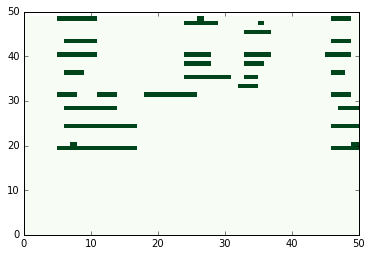

In [34]:
plt.pcolormesh(X_train[18376].T, cmap=plt.cm.Greens)

In [14]:
#Load Hyperparameters
cfgConst = ConfigConstants()
MICROSECONDS_PER_MINUTE = cfgConst.getMicroSecPerMins()
time_per_time_slice = cfgConst.getTimePerTimeSlice()
highest_note = cfgConst.getHighestNote()
lowest_note = cfgConst.getLowestNote()  # A_2
input_dim = cfgConst.getInputDim() # number of notes in input
output_dim = cfgConst.getOutputDim()  # number of notes in output

x_seq_length = cfgConst.getXSeqLen()  # Piano roll matrix of dimention 50x49
y_seq_length = cfgConst.getYSeqLen()

num_units = 128

#callBacks = [EarlyStopping(monitor='loss', patience=10, min_delta = 0.01 , verbose=0, mode='min'),TensorBoard(log_dir='output/graph_10Per', histogram_freq=1), History()]

callBacks = [EarlyStopping(monitor='loss', patience=10, min_delta = 0.01 , verbose=1, mode='min'), History()]

Configurations Initialized........


In [15]:
#Create Model
model = createModel(num_units, input_dim, output_dim, x_seq_length, y_seq_length )
model.summary()

/home/nirban/PycharmProjects/MscMusicProject/Seq2SeqModel.py:18: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
  model.add(LSTM(input_dim=input_dim, output_dim=num_units, activation='tanh', return_sequences=True))
/home/nirban/PycharmProjects/MscMusicProject/Seq2SeqModel.py:18: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(return_sequences=True, activation="tanh", input_shape=(None, 49), units=128)`
  model.add(LSTM(input_dim=input_dim, output_dim=num_units, activation='tanh', return_sequences=True))


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, None, 128)         91136     
_________________________________________________________________
batch_normalization_4 (Batch (None, None, 128)         512       
_________________________________________________________________
dropout_4 (Dropout)          (None, None, 128)         0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_3 (Dense)              (None, 128)               16512     
_________________________________________________________________
repeat_vector_2 (RepeatVecto (None, 50, 128)           0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 50, 128)           131584    
__________

In [16]:
def saveHistory(history):
    print("\nSaving History.....")
    with h5py.File("HistoryData.h5", "w") as fl:
        for i in history.history.keys():
            print("\nSaving : ", i)
            fl.create_dataset(i, data=history.history[i])
            
    print("\nHistory Saved Successfully.....")

In [ ]:
history = model.fit(X_train, Y_train, validation_data=(X_val, Y_val), batch_size=64, epochs=1, shuffle='batch', callbacks=callBacks)

In [ ]:
model.save('seqTimeDistributedModel.h5')

In [18]:
saveHistory(history)

NameError: name 'history' is not defined